In [1]:
%matplotlib widget
import random
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

SEATS = 1000
STOPS = 1000
ITER_NUM = 100_000

NAMES = ["Joe", "Bob", "Bill", "Robert", "Eugene", "Doug", "Garlic", "Kevin", "Jesus", "Christ"]

votes_dict = {}
current_stop = 0

#max_wait = 0

#average_wait = 0

In [2]:
def person_stop():
    return {0: lambda: -math.ceil(math.log2(random.random())), 
            1: lambda: st if (st := random.randint(0,SEATS-2)) != current_stop else st+1,
            2: lambda: st if (st := random.randint(0,STOPS-2)) != current_stop else st+1}[2]()

In [3]:
class Person:
    def __init__(self):
        global current_stop
        self.name = random.choice(NAMES)
        self.stop = person_stop()
        self.wait = 0
    
    def vote(self):
        if self.stop not in votes_dict.keys():
            votes_dict[self.stop] = 1
        votes_dict[self.stop] += 1
        self.wait += 1

    def __repr__(self):
        return f"Name: {self.name} \t Stop: {self.stop}"

In [4]:
def generate_people(n):
    return {Person() for _ in range(n)}

In [5]:
def vote(people):
    for person in people:
        person.vote()

In [6]:
def get_stop():
    global current_stop
    vote_max = max(list(votes_dict.values()))
    stop = list(votes_dict.keys())[list(votes_dict.values()).index(vote_max)]
    current_stop = stop
    return stop

In [7]:
def update(people):
    global max_wait, average_wait

    stop = get_stop()
    
    votes_dict[stop] = 0

    leaving_people = {person for person in people if person.stop == stop}
    people = people.difference(leaving_people)

    people = people.union(generate_people(len(leaving_people)))

    #max_wait += max(person.wait for person in leaving_people)
    #average_wait += sum(person.wait for person in leaving_people)/len(leaving_people)
    
    return people

In [8]:
people = generate_people(SEATS)

records = []

for _ in range(ITER_NUM):
    vote(people)
    records.append(max(list(votes_dict.values())))
    people = update(people)


In [9]:
#print(max_wait/ITER_NUM)
#print(average_wait/ITER_NUM)

print("Average: " + str(sum(records[2000:ITER_NUM])/(ITER_NUM-2000) ))
print("Number of stops: " + str(len(votes_dict)))
pprint(votes_dict)

Average: 999.9126530612245
Number of stops: 999
{0: 142,
 1: 647,
 2: 916,
 3: 770,
 4: 7,
 5: 663,
 6: 0,
 7: 0,
 8: 256,
 9: 974,
 10: 329,
 11: 355,
 12: 615,
 13: 148,
 14: 0,
 15: 110,
 16: 841,
 17: 0,
 18: 738,
 19: 0,
 20: 448,
 21: 997,
 22: 0,
 23: 0,
 24: 759,
 25: 0,
 26: 502,
 27: 118,
 28: 2,
 29: 0,
 30: 192,
 31: 386,
 32: 0,
 33: 0,
 34: 368,
 35: 0,
 36: 955,
 37: 902,
 38: 0,
 39: 188,
 40: 0,
 41: 186,
 42: 0,
 43: 0,
 44: 320,
 45: 230,
 46: 483,
 47: 312,
 48: 749,
 49: 0,
 50: 0,
 51: 941,
 52: 93,
 53: 0,
 54: 195,
 55: 894,
 56: 0,
 57: 0,
 58: 0,
 59: 481,
 60: 474,
 61: 123,
 62: 0,
 63: 717,
 64: 0,
 65: 654,
 66: 86,
 67: 910,
 68: 385,
 69: 0,
 70: 761,
 71: 773,
 72: 0,
 73: 225,
 74: 312,
 75: 57,
 76: 940,
 77: 0,
 78: 320,
 79: 0,
 80: 0,
 81: 428,
 82: 0,
 83: 0,
 84: 0,
 85: 239,
 86: 1005,
 87: 546,
 88: 0,
 89: 689,
 90: 0,
 91: 308,
 92: 139,
 93: 541,
 94: 198,
 95: 0,
 96: 805,
 97: 652,
 98: 22,
 99: 246,
 100: 199,
 101: 25,
 102: 773,
 103: 0

In [10]:
#pr = pd.DataFrame(records).value_counts().sort_index()
#pr.plot.bar()

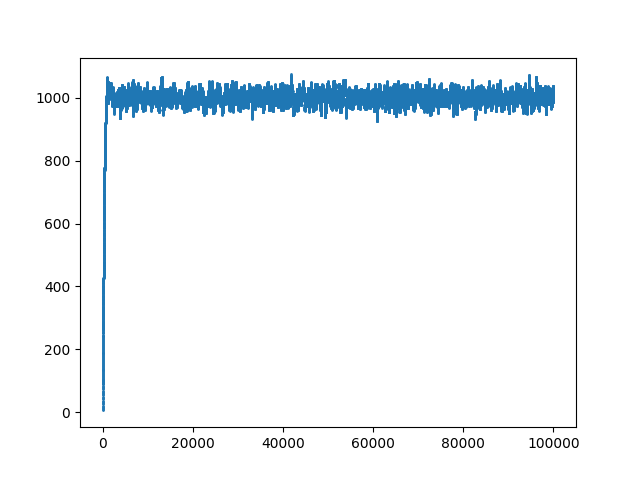

In [11]:
plt.scatter(np.arange(0, ITER_NUM), records, s=1)
plt.show()